In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

In [63]:
df = pd.read_csv('articles_topics.csv')

In [64]:
df2 = pd.read_csv('food_crises_month_imputed.csv')


In [69]:
df2.head(10)

,datetime,country,district_code,district,centx,centy,year_month,year,month,ipc,...,area,cropland_pct,pop,ruggedness_mean,pasture_pct,date,province,administrative_region,quarters,Month
0,2009-07-01,South Sudan,74,Bor,32.00486,6.465644,2009_07,2009,7,2.0,...,14008.33,7.961984,256618.0,11393.76,90.8503,2009-07-01,Greater Upper Nile,Greater Upper Nile,2009Q3,2009-07
1,2009-08-01,South Sudan,74,Bor,32.00486,6.465644,2009_08,2009,8,2.0,...,14008.33,7.961984,256618.0,11393.76,90.8503,2009-08-01,Greater Upper Nile,Greater Upper Nile,2009Q3,2009-08
2,2009-09-01,South Sudan,74,Bor,32.00486,6.465644,2009_09,2009,9,2.0,...,14008.33,7.961984,256618.0,11393.76,90.8503,2009-09-01,Greater Upper Nile,Greater Upper Nile,2009Q3,2009-09
3,2009-10-01,South Sudan,74,Bor,32.00486,6.465644,2009_10,2009,10,2.0,...,14008.33,7.961984,256618.0,11393.76,90.8503,2009-10-01,Greater Upper Nile,Greater Upper Nile,2009Q4,2009-10
4,2009-11-01,South Sudan,74,Bor,32.00486,6.465644,2009_11,2009,11,2.0,...,14008.33,7.961984,256618.0,11393.76,90.8503,2009-11-01,Greater Upper Nile,Greater Upper Nile,2009Q4,2009-11
5,2009-12-01,South Sudan,74,Bor,32.00486,6.465644,2009_12,2009,12,2.0,...,14008.33,7.961984,256618.0,11393.76,90.8503,2009-12-01,Greater Upper Nile,Greater Upper Nile,2009Q4,2009-12
6,2010-01-01,South Sudan,74,Bor,32.00486,6.465644,2010_01,2010,1,1.0,...,14008.33,7.961984,265263.0,11393.76,90.8503,2010-01-01,Greater Upper Nile,Greater Upper Nile,2010Q1,2010-01
7,2010-02-01,South Sudan,74,Bor,32.00486,6.465644,2010_02,2010,2,1.0,...,14008.33,7.961984,265263.0,11393.76,90.8503,2010-02-01,Greater Upper Nile,Greater Upper Nile,2010Q1,2010-02
8,2010-03-01,South Sudan,74,Bor,32.00486,6.465644,2010_03,2010,3,1.0,...,14008.33,7.961984,265263.0,11393.76,90.8503,2010-03-01,Greater Upper Nile,Greater Upper Nile,2010Q1,2010-03
9,2010-04-01,South Sudan,74,Bor,32.00486,6.465644,2010_04,2010,4,2.0,...,14008.33,7.961984,265263.0,11393.76,90.8503,2010-04-01,Greater Upper Nile,Greater Upper Nile,2010Q2,2010-04


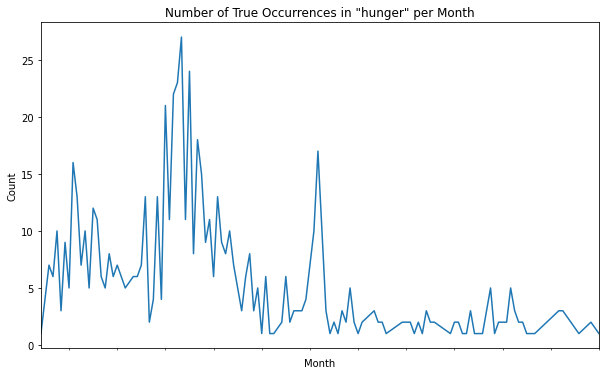

In [145]:
true_count = df['hunger'].sum()
df['date'] = pd.to_datetime(df['date'])
monthly_counts = df[df['hunger'] == True].groupby(df['date'].dt.to_period('M')).size()
monthly_counts.plot(kind='line', figsize=(10, 6))
plt.title('Number of True Occurrences in "hunger" per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xticks([])
plt.show()

In [73]:
df2['date'] = pd.to_datetime(df2['date'])
df2['Month'] = df2['date'].dt.to_period('M')
monthly_avg_ipc = df2.groupby('Month')['ipc'].mean().reset_index()
new_df = pd.DataFrame(monthly_avg_ipc)

In [77]:
avg_rain_df2 = df2.groupby('Month')['rain_mean'].mean().reset_index()

# Merge the average rain data into new_df
new_df = new_df.merge(avg_rain_df2, on='Month', how='left')

# Rename the merged column to 'avg_rain'
new_df.rename(columns={'rain_mean': 'avg_rain'}, inplace=True)

# Print the updated new_df


In [78]:
new_df.head()

,Month,ipc,avg_rain
0,2009-07,1.576923,19.861404
1,2009-08,1.576923,20.382230
2,2009-09,1.576923,21.611143
3,2009-10,1.679487,13.649606
4,2009-11,1.679487,2.450842


In [79]:
monthly_counts = df.groupby(df['date'].dt.strftime('%Y-%m')).size().reset_index(name='count')
monthly_counts.head()

new_df['totalcount'] = monthly_counts['count']
new_df.head(60)

,Month,ipc,avg_rain,totalcount
0,2009-07,1.576923,19.861404,26
1,2009-08,1.576923,20.382230,383
2,2009-09,1.576923,21.611143,215
3,2009-10,1.679487,13.649606,178
4,2009-11,1.679487,2.450842,189
5,2009-12,1.679487,1.179880,281
6,2010-01,1.320513,0.425513,452
7,2010-02,1.320513,1.982695,441
8,2010-03,1.320513,4.329146,426
9,2010-04,1.448718,8.977291,440


In [80]:
refugees_count_per_month = df[df['refugees'] == True].groupby(df['date'].dt.to_period('M')).size().reset_index()

# Rename the columns for clarity
refugees_count_per_month.columns = ['Month', 'refugees']

# Merge 'new_df' and 'refugees_count_per_month' based on the 'Month' column
merged_df = new_df.merge(refugees_count_per_month, on='Month', how='left')

# Display the merged DataFrame


In [81]:
conflict_count_per_month = df[df['conflict'] == True].groupby(df['date'].dt.to_period('M')).size().reset_index()

# Rename the columns for clarity
conflict_count_per_month.columns = ['Month', 'conflict']

# Merge 'new_df' and 'refugees_count_per_month' based on the 'Month' column
merged_df = merged_df.merge(conflict_count_per_month, on='Month', how='left')

# Display the merged DataFrame

In [82]:
nature_count_per_month = df[df['nature'] == True].groupby(df['date'].dt.to_period('M')).size().reset_index()

# Rename the columns for clarity
nature_count_per_month.columns = ['Month', 'nature']

# Merge 'new_df' and 'refugees_count_per_month' based on the 'Month' column
merged_df = merged_df.merge(nature_count_per_month, on='Month', how='left')

# Display the merged DataFrame

In [83]:
oil_count_per_month = df[df['oil'] == True].groupby(df['date'].dt.to_period('M')).size().reset_index()

# Rename the columns for clarity
oil_count_per_month.columns = ['Month', 'oil']

# Merge 'new_df' and 'refugees_count_per_month' based on the 'Month' column
merged_df = merged_df.merge(oil_count_per_month, on='Month', how='left')

# Display the merged DataFrame

In [84]:
hunger_count_per_month = df[df['hunger'] == True].groupby(df['date'].dt.to_period('M')).size().reset_index()

# Rename the columns for clarity
hunger_count_per_month.columns = ['Month', 'hunger']

# Merge 'new_df' and 'refugees_count_per_month' based on the 'Month' column
merged_df = merged_df.merge(hunger_count_per_month, on='Month', how='left')

# Display the merged DataFrame

In [85]:
humanitarian_count_per_month = df[df['humanitarian'] == True].groupby(df['date'].dt.to_period('M')).size().reset_index()

# Rename the columns for clarity
humanitarian_count_per_month.columns = ['Month', 'humanitarian']

# Merge 'new_df' and 'refugees_count_per_month' based on the 'Month' column
merged_df = merged_df.merge(humanitarian_count_per_month, on='Month', how='left')

# Display the merged DataFrame

In [86]:
corruption_count_per_month = df[df['corruption'] == True].groupby(df['date'].dt.to_period('M')).size().reset_index()

# Rename the columns for clarity
corruption_count_per_month.columns = ['Month', 'corruption']

# Merge 'new_df' and 'refugees_count_per_month' based on the 'Month' column
merged_df = merged_df.merge(corruption_count_per_month, on='Month', how='left')

# Display the merged DataFrame

In [87]:
terrorism_count_per_month = df[df['terrorism'] == True].groupby(df['date'].dt.to_period('M')).size().reset_index()

# Rename the columns for clarity
terrorism_count_per_month.columns = ['Month', 'terrorism']

# Merge 'new_df' and 'refugees_count_per_month' based on the 'Month' column
merged_df = merged_df.merge(terrorism_count_per_month, on='Month', how='left')

# Display the merged DataFrame

In [88]:
livestock_count_per_month = df[df['livestock'] == True].groupby(df['date'].dt.to_period('M')).size().reset_index()

# Rename the columns for clarity
livestock_count_per_month.columns = ['Month', 'livestock']

# Merge 'new_df' and 'refugees_count_per_month' based on the 'Month' column
merged_df = merged_df.merge(livestock_count_per_month, on='Month', how='left')

# Display the merged DataFrame


In [89]:
merged_df[['refugees', 'nature', 'conflict', 'oil', 'hunger', 'humanitarian', 'terrorism', 'livestock', 'corruption']] = merged_df[['refugees', 'nature', 'conflict', 'oil', 'hunger', 'humanitarian', 'terrorism', 'livestock', 'corruption']].fillna(0)

In [90]:
merged_df['ratio_refugees'] = merged_df['refugees'] / merged_df['totalcount']
merged_df['ratio_conflict'] = merged_df['conflict'] / merged_df['totalcount']
merged_df['ratio_nature'] = merged_df['nature'] / merged_df['totalcount']
merged_df['ratio_oil'] = merged_df['oil'] / merged_df['totalcount']
merged_df['ratio_hunger'] = merged_df['hunger'] / merged_df['totalcount']
merged_df['ratio_humanitarian'] = merged_df['humanitarian'] / merged_df['totalcount']
merged_df['ratio_corruption'] = merged_df['corruption'] / merged_df['totalcount']
merged_df['ratio_terrorism'] = merged_df['terrorism'] / merged_df['totalcount']
merged_df['ratio_livestock'] = merged_df['livestock'] / merged_df['totalcount']

In [91]:
narrowed_df = merged_df.iloc[23:]

In [92]:
narrowed_df.to_csv('ratios_data.csv', index=False)

In [93]:
narrowed_df.head(100)

,Month,ipc,avg_rain,totalcount,refugees,conflict,nature,oil,hunger,humanitarian,...,livestock,ratio_refugees,ratio_conflict,ratio_nature,ratio_oil,ratio_hunger,ratio_humanitarian,ratio_corruption,ratio_terrorism,ratio_livestock
23,2011-06,1.512821,25.344397,165,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,0.000000,0.006061,0.006061,0.000000,0.006061,0.000000,0.000000,0.000000,0.012121
24,2011-07,2.076923,31.660387,230,0.0,7.0,3.0,16.0,4.0,1.0,...,8.0,0.000000,0.030435,0.013043,0.069565,0.017391,0.004348,0.021739,0.013043,0.034783
25,2011-08,2.076923,31.959185,317,4.0,3.0,6.0,12.0,7.0,2.0,...,13.0,0.012618,0.009464,0.018927,0.037855,0.022082,0.006309,0.015773,0.015773,0.041009
26,2011-09,2.076923,25.898711,265,4.0,4.0,6.0,5.0,6.0,1.0,...,8.0,0.015094,0.015094,0.022642,0.018868,0.022642,0.003774,0.030189,0.000000,0.030189
27,2011-10,1.512821,20.130752,240,4.0,5.0,8.0,9.0,10.0,1.0,...,12.0,0.016667,0.020833,0.033333,0.037500,0.041667,0.004167,0.016667,0.008333,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2019-05,3.269231,21.676371,43,0.0,0.0,1.0,5.0,1.0,0.0,...,2.0,0.000000,0.000000,0.023256,0.116279,0.023256,0.000000,0.069767,0.000000,0.046512
119,2019-06,3.269231,31.933700,35,1.0,0.0,1.0,1.0,3.0,2.0,...,1.0,0.028571,0.000000,0.028571,0.028571,0.085714,0.057143,0.085714,0.000000,0.028571
120,2019-07,2.124918,28.794085,30,1.0,0.0,1.0,2.0,2.0,0.0,...,1.0,0.033333,0.000000,0.033333,0.066667,0.066667,0.000000,0.000000,0.000000,0.033333
121,2019-08,2.124918,28.532698,59,2.0,0.0,5.0,2.0,2.0,1.0,...,1.0,0.033898,0.000000,0.084746,0.033898,0.033898,0.016949,0.000000,0.000000,0.016949


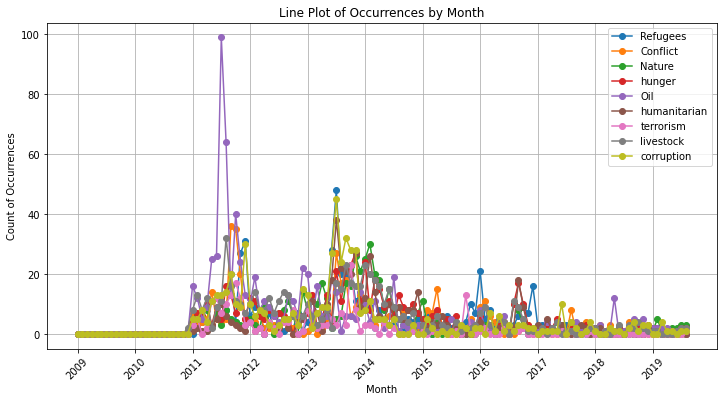

In [94]:
# Set the figure size
plt.figure(figsize=(12, 6))
merged_df['Month'] = merged_df['Month'].astype(str)
# Plot each column as a line
plt.plot(merged_df['Month'], merged_df['refugees'], label='Refugees', marker='o')
plt.plot(merged_df['Month'], merged_df['conflict'], label='Conflict', marker='o')
plt.plot(merged_df['Month'], merged_df['nature'], label='Nature', marker='o')
plt.plot(merged_df['Month'], merged_df['hunger'], label='hunger', marker='o')
plt.plot(merged_df['Month'], merged_df['oil'], label='Oil', marker='o')
plt.plot(merged_df['Month'], merged_df['humanitarian'], label='humanitarian', marker='o')
plt.plot(merged_df['Month'], merged_df['terrorism'], label='terrorism', marker='o')
plt.plot(merged_df['Month'], merged_df['livestock'], label='livestock', marker='o')
plt.plot(merged_df['Month'], merged_df['corruption'], label='corruption', marker='o')


# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count of Occurrences')
plt.title('Line Plot of Occurrences by Month')

tick_positions = range(0, len(merged_df['Month']), 12)  # Assuming data is monthly
tick_labels = [month.split('-')[0] for month in merged_df['Month'][::12]]
plt.xticks(tick_positions, tick_labels, rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [132]:
narrowed_df = merged_df.iloc[23:]

In [96]:
narrowedpart2_df = merged_df.iloc[67:]

In [97]:
narrowedpart2_df.to_csv('narrowedpart2.csv', index=False)

In [98]:
merged_df.to_csv('merged_data.csv', index=False)

In [99]:
narrowed_df.to_csv('narrowed_data.csv', index=False)

In [131]:
merged_df.head(120)

,Month,ipc,avg_rain,totalcount,refugees,conflict,nature,oil,hunger,humanitarian,...,livestock,ratio_refugees,ratio_conflict,ratio_nature,ratio_oil,ratio_hunger,ratio_humanitarian,ratio_corruption,ratio_terrorism,ratio_livestock
0,2009-07,1.576923,19.861404,26,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,2009-08,1.576923,20.382230,383,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,2009-09,1.576923,21.611143,215,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,2009-10,1.679487,13.649606,178,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,2009-11,1.679487,2.450842,189,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019-02,3.166667,1.161335,16,1.0,4.0,2.0,1.0,2.0,0.0,...,3.0,0.062500,0.250000,0.125000,0.062500,0.125000,0.000000,0.125000,0.0,0.187500
116,2019-03,3.166667,3.176463,34,0.0,0.0,0.0,5.0,1.0,2.0,...,2.0,0.000000,0.000000,0.000000,0.147059,0.029412,0.058824,0.117647,0.0,0.058824
117,2019-04,3.269231,8.837023,48,1.0,1.0,0.0,0.0,2.0,1.0,...,4.0,0.020833,0.020833,0.000000,0.000000,0.041667,0.020833,0.020833,0.0,0.083333
118,2019-05,3.269231,21.676371,43,0.0,0.0,1.0,5.0,1.0,0.0,...,2.0,0.000000,0.000000,0.023256,0.116279,0.023256,0.000000,0.069767,0.0,0.046512


In [101]:
narrowed_df.head()

,Month,ipc,avg_rain,totalcount,refugees,conflict,nature,oil,hunger,humanitarian,...,livestock,ratio_refugees,ratio_conflict,ratio_nature,ratio_oil,ratio_hunger,ratio_humanitarian,ratio_corruption,ratio_terrorism,ratio_livestock
23,2011-06,1.512821,25.344397,165,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,0.000000,0.006061,0.006061,0.000000,0.006061,0.000000,0.000000,0.000000,0.012121
24,2011-07,2.076923,31.660387,230,0.0,7.0,3.0,16.0,4.0,1.0,...,8.0,0.000000,0.030435,0.013043,0.069565,0.017391,0.004348,0.021739,0.013043,0.034783
25,2011-08,2.076923,31.959185,317,4.0,3.0,6.0,12.0,7.0,2.0,...,13.0,0.012618,0.009464,0.018927,0.037855,0.022082,0.006309,0.015773,0.015773,0.041009
26,2011-09,2.076923,25.898711,265,4.0,4.0,6.0,5.0,6.0,1.0,...,8.0,0.015094,0.015094,0.022642,0.018868,0.022642,0.003774,0.030189,0.000000,0.030189
27,2011-10,1.512821,20.130752,240,4.0,5.0,8.0,9.0,10.0,1.0,...,12.0,0.016667,0.020833,0.033333,0.037500,0.041667,0.004167,0.016667,0.008333,0.050000


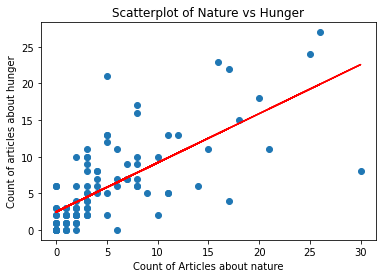

In [133]:
# Extract the data for the scatterplot
x = narrowed_df['nature']
y = narrowed_df['hunger']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Create the scatterplot
plt.scatter(x, y)

# Set axis labels
plt.xlabel('Count of Articles about nature')
plt.ylabel('Count of articles about hunger')

regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Regression Line (R-squared: {r_value**2:.2f})')

# Add a title (if needed)
plt.title('Scatterplot of Nature vs Hunger')

# Show the plot
plt.show()

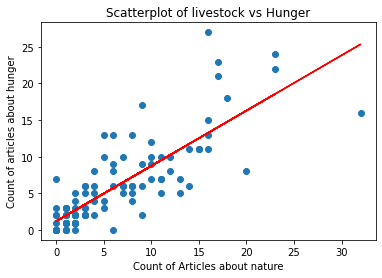

In [134]:
# Extract the data for the scatterplot
x = narrowed_df['livestock']
y = narrowed_df['hunger']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Create the scatterplot
plt.scatter(x, y)

# Set axis labels
plt.xlabel('Count of Articles about nature')
plt.ylabel('Count of articles about hunger')

regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Regression Line (R-squared: {r_value**2:.2f})')

# Add a title (if needed)
plt.title('Scatterplot of livestock vs Hunger')

# Show the plot
plt.show()

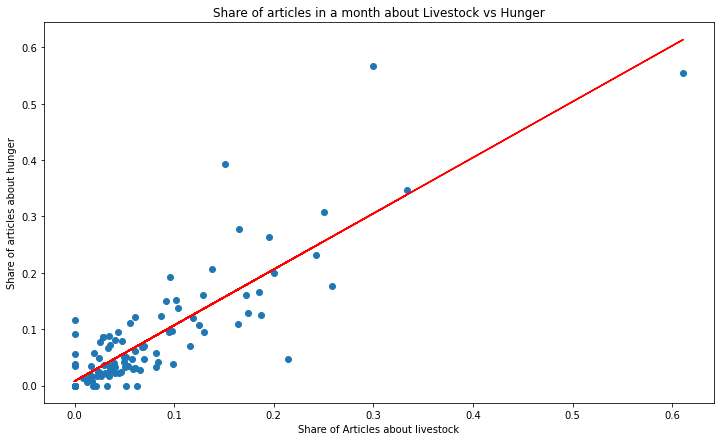

In [135]:
# Extract the data for the scatterplot
x = narrowed_df['ratio_livestock']
y = narrowed_df['ratio_hunger']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Create the scatterplot
plt.figure(figsize=(12, 7))
plt.scatter(x, y)

# Set axis labels
plt.xlabel('Share of Articles about livestock')
plt.ylabel('Share of articles about hunger')

regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Regression Line (R-squared: {r_value**2:.2f})')


plt.title('Share of articles in a month about Livestock vs Hunger')

# Show the plot
plt.show()

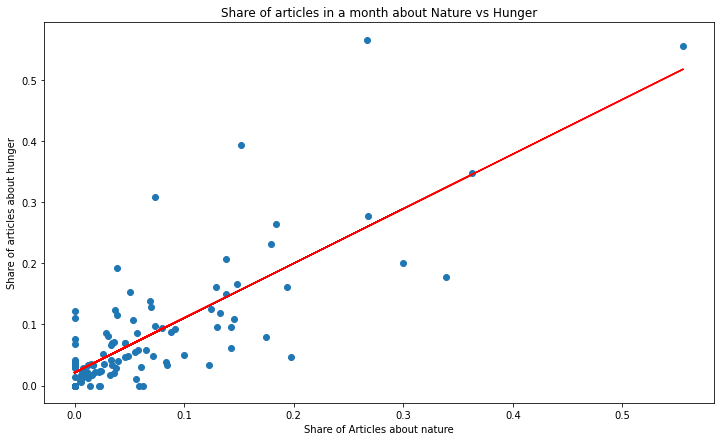

In [136]:
# Extract the data for the scatterplot
x = narrowed_df['ratio_nature']
y = narrowed_df['ratio_hunger']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Create the scatterplot
plt.figure(figsize=(12, 7))
plt.scatter(x, y)

# Set axis labels
plt.xlabel('Share of Articles about nature')
plt.ylabel('Share of articles about hunger')

regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Regression Line (R-squared: {r_value**2:.2f})')


plt.title('Share of articles in a month about Nature vs Hunger')

# Show the plot
plt.show()

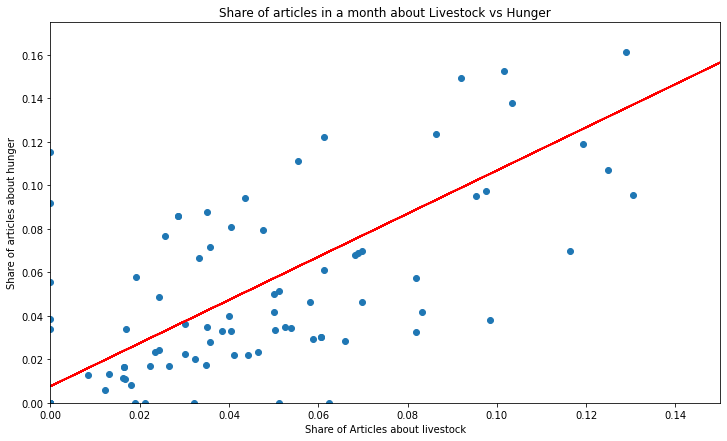

In [137]:
# Extract the data for the scatterplot
x = narrowed_df['ratio_livestock']
y = narrowed_df['ratio_hunger']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Create the scatterplot
plt.figure(figsize=(12, 7))
plt.scatter(x, y)

plt.xlim(0, 0.15)
plt.ylim(0, 0.175)

# Set axis labels
plt.xlabel('Share of Articles about livestock')
plt.ylabel('Share of articles about hunger')

regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Regression Line (R-squared: {r_value**2:.2f})')


plt.title('Share of articles in a month about Livestock vs Hunger')

# Show the plot
plt.show()

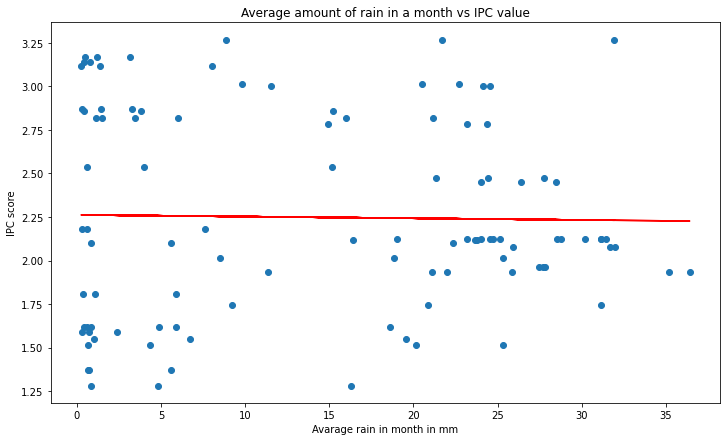

In [143]:
# Extract the data for the scatterplot
y = narrowed_df['ipc']
x = narrowed_df['avg_rain']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Create the scatterplot
plt.figure(figsize=(12, 7))
plt.scatter(x, y)

#plt.xlim(0, 35)
#plt.ylim(0, 5)

# Set axis labels
plt.xlabel('Avarage rain in month in mm')
plt.ylabel('IPC score')

regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Regression Line (R-squared: {r_value**2:.2f})')


plt.title('Average amount of rain in a month vs IPC value')

# Show the plot
plt.show()

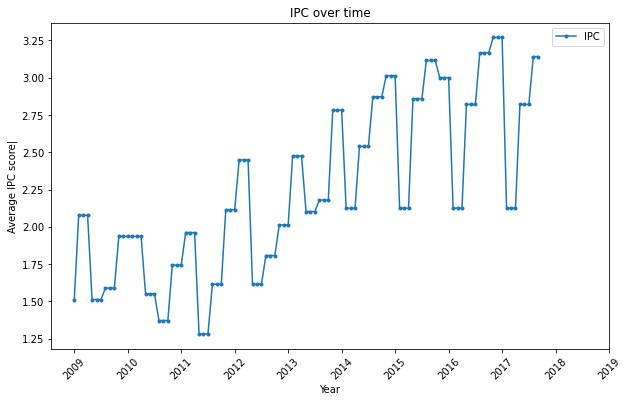

In [174]:
# Create the line plot
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.plot(narrowed_df['Month'], narrowed_df['ipc'], marker='o', linestyle='-', label='IPC', markersize = 3)



#plt.plot(narrowed_df['Month'], narrowed_df['ratio_ipc'], label='Livestock', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average IPC score|')
plt.title('IPC over time')

tick_positions = range(0, len(merged_df['Month']), 12)  # Assuming data is monthly
tick_labels = [month.split('-')[0] for month in merged_df['Month'][::12]]
plt.xticks(tick_positions, tick_labels, rotation=45)

# Display the plot
plt.legend()
plt.show()

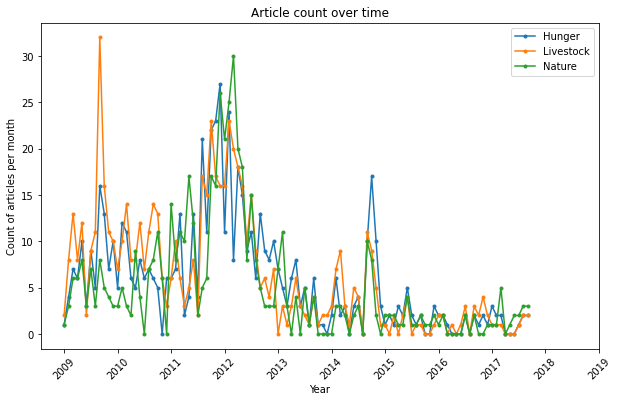

In [175]:
# Create the line plot
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.plot(narrowed_df['Month'], narrowed_df['hunger'], marker='o', linestyle='-', label='Hunger', markersize = 3)
plt.plot(narrowed_df['Month'], narrowed_df['livestock'], label='Livestock', marker='o' , markersize = 3)
plt.plot(narrowed_df['Month'], narrowed_df['nature'], label='Nature', marker='o' , markersize = 3)


#plt.plot(narrowed_df['Month'], narrowed_df['ratio_ipc'], label='Livestock', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count of articles per month')
plt.title('Article count over time')

tick_positions = range(0, len(merged_df['Month']), 12)  # Assuming data is monthly
tick_labels = [month.split('-')[0] for month in merged_df['Month'][::12]]
plt.xticks(tick_positions, tick_labels, rotation=45)

# Display the plot
plt.legend()
plt.show()

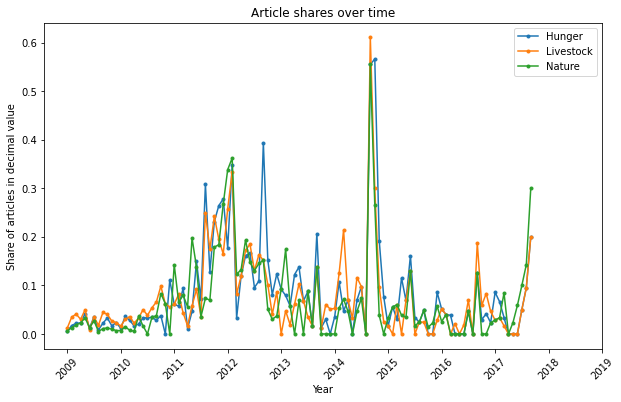

In [170]:
# Create the line plot
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.plot(narrowed_df['Month'], narrowed_df['ratio_hunger'], marker='o', linestyle='-', label='Hunger', markersize = 3)
plt.plot(narrowed_df['Month'], narrowed_df['ratio_livestock'], label='Livestock', marker='o' , markersize = 3)
plt.plot(narrowed_df['Month'], narrowed_df['ratio_nature'], label='Nature', marker='o' , markersize = 3)


#plt.plot(narrowed_df['Month'], narrowed_df['ratio_ipc'], label='Livestock', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Share of articles in decimal value')
plt.title('Article shares over time')

tick_positions = range(0, len(merged_df['Month']), 12)  # Assuming data is monthly
tick_labels = [month.split('-')[0] for month in merged_df['Month'][::12]]
plt.xticks(tick_positions, tick_labels, rotation=45)

# Display the plot
plt.legend()
plt.show()